In [1]:
import pandas as pd
import ast
import numpy as np
import matplotlib.pyplot as plt
df_youtube_comment = pd.read_csv('data_preprocessed_sample.csv')

df_youtube_comment.columns = ["commentResult", "label"]
df_youtube_comment.head()

,commentResult,label
0,['senang'],1
1,"['irawan', 'duit', 'kagak']",1
2,"['loba', 'teuing', 'ngurus', 'proyek']",1
3,"['mantap', 'naik', 'saja', 'nya', 'rakyat', 's...",1
4,"['subsidi', 'tidak', 'cabut', 'tapi', 'alih', ...",1


In [2]:
def convert_text_list(texts):
    texts = ast.literal_eval(texts)
    return [text for text in texts]

df_youtube_comment["commentResult"] = df_youtube_comment["commentResult"].apply(convert_text_list)

In [3]:
from nltk import word_tokenize

corpus = []

def appendToCorpus(text):
    # rejoin text
    word = ' '.join(text)
    
    # add to corpus
    corpus.append(word)
    
    return text

df_youtube_comment['commentResult'] = df_youtube_comment['commentResult'].apply(appendToCorpus)
df_youtube_comment


,commentResult,label
0,[senang],1
1,"[irawan, duit, kagak]",1
2,"[loba, teuing, ngurus, proyek]",1
3,"[mantap, naik, saja, nya, rakyat, sudah, kaya,...",1
4,"[subsidi, tidak, cabut, tapi, alih, dari, subs...",1
...,...,...
337,"[tidak, jokowi, karena, rakyat, tau, bayar, hu...",0
338,"[ngundakno, sak, enak]",0
339,"[ya, allah, ya, robbi, bbm, pupuk, susah, dida...",0
340,"[kayak, jajah, perintah, saat, miyak, dunia, t...",0


In [4]:
corpus

['senang',
 'irawan duit kagak',
 'loba teuing ngurus proyek',
 'mantap naik saja nya rakyat sudah kaya raya nggak miskin periode agar rakyat senang',
 'subsidi tidak cabut tapi alih dari subsidi barang subsidi masyarakat dalam bentuk blt',
 'bbm tidak subsidi pajak kendara sim hapus kendara bebas pajak',
 'lanjut periode',
 'tidak masuk akal negara harga negara gerak maju untuk korupsi',
 'apbn habis mindah ibukota',
 'kecil ribu barang langkah orang papua keluh katain negeri minyak barang baik baik',
 'periode',
 'perintah salah bbm hutang negara makin tingkat bbm tuju ya mudah an putus ambil perintah indonesia makin maju',
 'tidak apa bbm bantu pemerinta',
 'hormat bp tri jangan awas tapi cctv spbu terima',
 'dana pindah kota sudah tipis sih ya saja bbm',
 'harap tenang partai cilik',
 'mantap habis pbb susul',
 'bbm jenis partalite rupiah rakyat indonesia sudah demo malaysia harga partalite ringgit tidak demo rnggit rupiah',
 'median harga bbm murah usa octane gallon rp gallon rp l

In [5]:
# def calc_TF(document):
#     # Counts the number of times the word appears in review
#     TF_dict = {}
#     for term in document:
#         if term in TF_dict:
#             TF_dict[term] += 1
#         else:
#             TF_dict[term] = 1
#     # Computes tf for each word
#     for term in TF_dict:
#         TF_dict[term] = TF_dict[term] / len(document)
#     return TF_dict

# df_youtube_comment["TF_dict"] = df_youtube_comment['commentResult'].apply(calc_TF)


In [6]:
# index = 201

# print('%20s' % "term", "\t", "TF\n")
# for key in df_youtube_comment["TF_dict"][index]:
#     print('%20s' % key, "\t", df_youtube_comment["TF_dict"][index][key])

In [7]:
# def calc_DF(tfDict):
#     count_DF = {}
#     # Run through each document's tf dictionary and increment countDict's (term, doc) pair
#     for document in tfDict:
#         for term in document:
#             if term in count_DF:
#                 count_DF[term] += 1
#             else:
#                 count_DF[term] = 1
#     return count_DF

# DF = calc_DF(df_youtube_comment["TF_dict"])
# DF

In [8]:
# n_document = len(df_youtube_comment)

# def calc_IDF(__n_document, __DF):
#     IDF_Dict = {}
#     for term in __DF:
#         IDF_Dict[term] = np.log(__n_document / (__DF[term] + 1))
#     return IDF_Dict
  
# #Stores the idf dictionary
# IDF = calc_IDF(n_document, DF)
# IDF

In [9]:
# #calc TF-IDF
# def calc_TF_IDF(TF):
#     TF_IDF_Dict = {}
#     #For each word in the review, we multiply its tf and its idf.
#     for key in TF:
#         TF_IDF_Dict[key] = TF[key] * IDF[key]
#     return TF_IDF_Dict

# #Stores the TF-IDF Series
# df_youtube_comment["TF-IDF_dict"] = df_youtube_comment["TF_dict"].apply(calc_TF_IDF)
# # df_youtube_comment["TF-IDF_dict"] 

In [10]:
# # Check TF-IDF result
# index = 331

# print('%20s' % "term", "\t", '%10s' % "TF", "\t", '%20s' % "TF-IDF\n")
# for key in df_youtube_comment["TF-IDF_dict"][index]:
#     print('%20s' % key, "\t", df_youtube_comment["TF_dict"][index][key] ,"\t" , df_youtube_comment["TF-IDF_dict"][index][key])


## Term Weighting

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import normalize

vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(corpus)
feature_names = vectorizer.get_feature_names_out()
dense = vectors.todense()
denselist = dense.tolist()
dataframe_tfidf = pd.DataFrame(denselist, columns=feature_names)

dataframe_tfidf.tail()

,ada,adik,adil,agar,air,aja,ajar,aju,akal,akibat,...,warga,warna,warung,widodo,wiraswasta,ya,yang,youtube,zalim,zaman
337,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
338,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
339,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.153294,0.0,0.0,0.0,0.0
340,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
341,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


## Proses Modelling

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

X = vectors.toarray()
y = df_youtube_comment['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 0)

MNB_model = MultinomialNB()
MNB_train = MNB_model.fit(X_train, y_train)

y_pred = MNB_train.predict(X_test)

In [13]:

y_pred

array([1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1], dtype=int64)

## Evaluation

In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [15]:
# def eval():
metrics = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
    
print('Confusion Metrics:\n', metrics)
print('Accuracy: ', accuracy)
print('Precision: ', precision)
print('Recall: ', recall)
print('F1-Score: ', f1)
# eval()

Confusion Metrics:
 [[24  4]
 [ 7 34]]
Accuracy:  0.8405797101449275
Precision:  0.8947368421052632
Recall:  0.8292682926829268
F1-Score:  0.860759493670886


In [16]:
y_pred_train = MNB_train.predict(X_train)
accuracy_training = accuracy_score(y_train, y_pred_train)
print("accuracy training: ", accuracy_training)

accuracy training:  0.967032967032967


In [17]:
# plt.scatter(X, y, color='red')
# plt.plot(X_train,MNB_train.predict(X_train), color='blue')
# plt.title('MBN model')
# plt.show()
# print(X_train)
# test = y_train.toarray()
# print(test)

In [18]:
text_input = input("Input teks: ")

vec_text_input = vectorizer.transform([text_input])

if(MNB_train.predict(vec_text_input) == [0]):
    print("\nHasil Sentimen: negatif (0)")
else:
    print("\nHasil Sentimen: positif (1)")

Input teks: jokowi

Hasil Sentimen: negatif (0)


In [19]:
####

## Evaluation Testing: Split Validation

In [20]:
total_scenario = 4

###### Membuat 4 skenario uji sebagai berikut:
- skenario 1: 10% data testing dan 90% data training
- skenario 2: 20% data testing dan 80% data training
- skenario 3: 30% data testing dan 70% data training
- skenario 4: 40% data testing dan 60% data training

In [21]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, test_size = 0.1, random_state = 0)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X, y, test_size = 0.3, random_state = 0)
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X, y, test_size = 0.4, random_state = 0)

MNB_model = MultinomialNB()
MNB_train_1 = MNB_model.fit(X_train_1, y_train_1)

MNB_model = MultinomialNB()
MNB_train_2 = MNB_model.fit(X_train_2, y_train_2)

MNB_model = MultinomialNB()
MNB_train_3 = MNB_model.fit(X_train_3, y_train_3)

MNB_model = MultinomialNB()
MNB_train_4 = MNB_model.fit(X_train_4, y_train_4)

In [22]:
y_pred_1 = MNB_train_1.predict(X_test_1)
y_pred_2 = MNB_train_2.predict(X_test_2)
y_pred_3 = MNB_train_3.predict(X_test_3)
y_pred_4 = MNB_train_4.predict(X_test_4)

In [23]:
# accuracy
accuracy_1 = accuracy_score(y_test_1, y_pred_1)
accuracy_2 = accuracy_score(y_test_2, y_pred_2)
accuracy_3 = accuracy_score(y_test_3, y_pred_3)
accuracy_4 = accuracy_score(y_test_4, y_pred_4)

# precision
precision_1 = precision_score(y_test_1, y_pred_1)
precision_2 = precision_score(y_test_2, y_pred_2)
precision_3 = precision_score(y_test_3, y_pred_3)
precision_4 = precision_score(y_test_4, y_pred_4)

# recall
recall_1 = recall_score(y_test_1, y_pred_1)
recall_2 = recall_score(y_test_2, y_pred_2)
recall_3 = recall_score(y_test_3, y_pred_3)
recall_4 = recall_score(y_test_4, y_pred_4)

# f1_score
f1_1 = f1_score(y_test_1, y_pred_1)
f1_2 = f1_score(y_test_2, y_pred_2)
f1_3 = f1_score(y_test_3, y_pred_3)
f1_4 = f1_score(y_test_4, y_pred_4)


In [24]:
print("Test Accuracy 1: ",accuracy_1)
print("Test Accuracy 2: ",accuracy_2)
print("Test Accuracy 3: ",accuracy_3)
print("Test Accuracy 4: ",accuracy_4)

Test Accuracy 1:  0.8285714285714286
Test Accuracy 2:  0.8405797101449275
Test Accuracy 3:  0.7475728155339806
Test Accuracy 4:  0.7372262773722628


In [25]:
print("Precision 1: ",precision_1)
print("Precision 2: ",precision_2)
print("Precision 3: ",precision_3)
print("Precision 4: ",precision_4)

Precision 1:  0.8
Precision 2:  0.8947368421052632
Precision 3:  0.7924528301886793
Precision 4:  0.7761194029850746


In [26]:
print("recall 1: ",recall_1)
print("recall 2: ",recall_2)
print("recall 3: ",recall_3)
print("recall 4: ",recall_4)

recall 1:  0.8888888888888888
recall 2:  0.8292682926829268
recall 3:  0.7368421052631579
recall 4:  0.7123287671232876


In [27]:
print("f1_1: ",f1_1)
print("f1_2: ",f1_2)
print("f1_3: ",f1_3)
print("f1_4: ",f1_4)

f1_1:  0.8421052631578948
f1_2:  0.860759493670886
f1_3:  0.7636363636363637
f1_4:  0.7428571428571429


In [28]:
avg_accuracy = (accuracy_1 + accuracy_2 + accuracy_3 + accuracy_4)/total_scenario
print("rata-rata akurasi: ", avg_accuracy)

avg_precision = (precision_1 + precision_2 + precision_3 + precision_4)/total_scenario
print("rata-rata presisi: ", avg_precision)

avg_recall = (recall_1 + recall_2 + recall_3 + recall_4)/total_scenario
print("rata-rata recall: ", avg_recall)

avg_f1 = (f1_1 + f1_2 + f1_3 + f1_4)/total_scenario
print("rata-rata f1-score: ", avg_f1)

rata-rata akurasi:  0.7884875579056498
rata-rata presisi:  0.8158272688197542
rata-rata recall:  0.7918320134895653
rata-rata f1-score:  0.8023395658305719


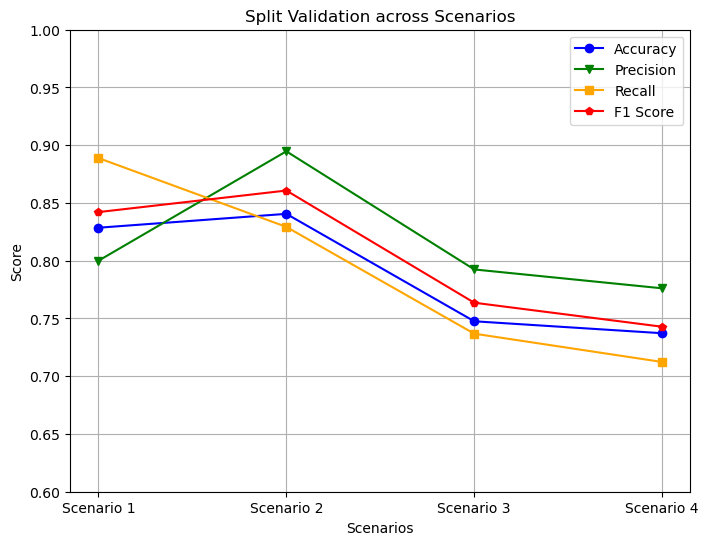

<Figure size 640x480 with 0 Axes>

In [29]:
import matplotlib.pyplot as plt

scenarios = ['Scenario 1', 'Scenario 2', 'Scenario 3', 'Scenario 4']  # Example scenario names
accuracy_scores = [accuracy_1, accuracy_2, accuracy_3, accuracy_4]  # Example accuracy scores for each scenario
precision_scores = [precision_1, precision_2, precision_3, precision_4]  # Example precision scores for each scenario
recall_scores = [recall_1, recall_2, recall_3, recall_4]  # Example recall scores for each scenario
f1_scores = [f1_1, f1_2, f1_3, f1_4]  # Example F1 scores for each scenario

# Plotting the line graph
plt.figure(figsize=(8, 6))

plt.plot(scenarios, accuracy_scores, marker='o', linestyle='-', color='blue', label='Accuracy')
plt.plot(scenarios, precision_scores, marker='v', linestyle='-', color='green', label='Precision')
plt.plot(scenarios, recall_scores, marker='s', linestyle='-', color='orange', label='Recall')
plt.plot(scenarios, f1_scores, marker='p', linestyle='-', color='red', label='F1 Score')

plt.ylim(0.6, 1)  # Set the y-axis limit to the range [0, 1]
plt.title('Split Validation across Scenarios')
plt.xlabel('Scenarios')
plt.ylabel('Score')
plt.legend()  # Add legend to distinguish the lines
plt.grid(True)  # Add a grid for better visualization
plt.show()

